In [44]:
import os
import io
import pandas as pd
from google.cloud import storage
import ast
import matplotlib.pyplot as plt

##### accounts_attendance

In [8]:
accounts_attendance = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_attendance.parquet', engine='pyarrow')

In [5]:
accounts_attendance

,id,attendance_date_list,user_id
0,1,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1446852
1,2,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1359398
2,3,"[""2023-05-27"", ""2023-05-29"", ""2023-05-30"", ""20...",1501542
3,4,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1507767
4,5,"[""2023-05-27"", ""2023-05-28"", ""2023-05-29"", ""20...",1287453
...,...,...,...
349632,360501,[],897005
349633,360502,"[""2024-05-09""]",1407059
349634,360503,"[""2024-05-09""]",1583727
349635,360504,"[""2024-05-09""]",1392372


In [9]:
accounts_attendance['attendance_date_list'] = accounts_attendance['attendance_date_list'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [11]:
accounts_attendance.explode('attendance_date_list').duplicated(subset=['attendance_date_list','user_id']).sum()

0

##### accounts_blockrecord

In [16]:
accounts_blockrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_blockrecord.parquet', engine='pyarrow')

In [19]:
accounts_blockrecord

,id,reason,created_at,block_user_id,user_id
0,1,그냥...,2023-05-04 23:01:53,867483,878476
1,2,친구 사이가 어색해짐,2023-05-05 01:17:08,867190,867564
2,3,나랑 관련 없는 질문을 자꾸 보냄,2023-05-05 01:50:55,875110,875261
3,6,그냥...,2023-05-05 05:21:52,883696,883511
4,7,그냥...,2023-05-05 06:40:34,871349,870177
...,...,...,...,...,...
19477,25355,사칭 계정,2024-04-05 08:15:03,875351,879416
19478,25356,친구 사이가 어색해짐,2024-04-25 09:28:19,1444256,1292346
19479,25357,친구 사이가 어색해짐,2024-04-25 09:28:24,1379126,1292346
19480,25360,모르는 사람임,2024-05-05 11:06:31,1582869,1583612


In [22]:
accounts_blockrecord.loc[accounts_blockrecord.duplicated(subset=['block_user_id','user_id']) == True]

,id,reason,created_at,block_user_id,user_id
9,13,기타,2023-05-05 13:04:42,885794,879662
10,14,그냥...,2023-05-05 13:04:52,885794,879662
11,15,기타,2023-05-05 13:04:56,885794,879662
12,16,기타,2023-05-05 13:05:01,885794,879662
14,18,친구 사이가 어색해짐,2023-05-05 13:17:26,886605,881070
...,...,...,...,...,...
19227,24885,모르는 사람임,2023-08-15 18:38:38,992181,1072478
19228,24886,모르는 사람임,2023-08-15 18:38:41,992181,1072478
19240,24899,친구 사이가 어색해짐,2023-08-18 12:12:28,1500131,1365572
19248,24912,모르는 사람임,2023-08-21 23:12:23,1029653,955098


##### accounts_failpaymenthistory

In [ ]:
accounts_failpaymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet', engine='pyarrow')

##### accounts_friendrequest

In [ ]:
accounts_friendrequest = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_friendrequest.parquet', engine='pyarrow')

##### accounts_group

In [ ]:
accounts_group = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_group.parquet', engine='pyarrow')

##### accounts_nearbyschool

In [ ]:
accounts_nearbyschool = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet', engine='pyarrow')

##### accounts_paymenthistory

In [ ]:
accounts_paymenthistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet', engine='pyarrow')

##### accounts_user_contacts

In [ ]:
accounts_user_contacts = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user_contacts.parquet', engine='pyarrow')

##### accounts_pointhistory

In [ ]:
accounts_pointhistory = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_pointhistory.parquet', engine='pyarrow')

##### accounts_school

In [ ]:
accounts_school = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_school.parquet', engine='pyarrow')

##### accounts_timelinereport

In [ ]:
accounts_timelinereport = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_timelinereport.parquet', engine='pyarrow')

##### accounts_user

In [ ]:
accounts_user = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_user.parquet', engine='pyarrow')

##### accounts_userquestionrecord

In [ ]:
accounts_userquestionrecord = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet', engine='pyarrow')

##### accounts_userwithdraw

In [ ]:
accounts_userwithdraw = pd.read_parquet('gs://sprintda05_final_project/votes/accounts_userwithdraw.parquet', engine='pyarrow')

##### event_receipts

In [ ]:
event_receipts = pd.read_parquet('gs://sprintda05_final_project/votes/event_receipts.parquet', engine='pyarrow')

##### events

In [ ]:
events = pd.read_parquet('gs://sprintda05_final_project/votes/events.parquet', engine='pyarrow')

##### polls_question

In [12]:
polls_question = pd.read_parquet('gs://sprintda05_final_project/votes/polls_question.parquet', engine='pyarrow')

In [30]:
hour = polls_question['created_at'].dt.hour

In [35]:
polls_question.loc[polls_question['created_at'].dt.hour == 3]

,id,question_text,created_at
462,561,얘랑 친해지면 세상 모두랑 친해질 수 있을 것 같았던 사람은?,2023-05-04 03:36:37


In [38]:
hour.value_counts()

created_at
6     1966
8     1523
14     732
13     250
5      235
15     164
11     154
3        1
Name: count, dtype: int64

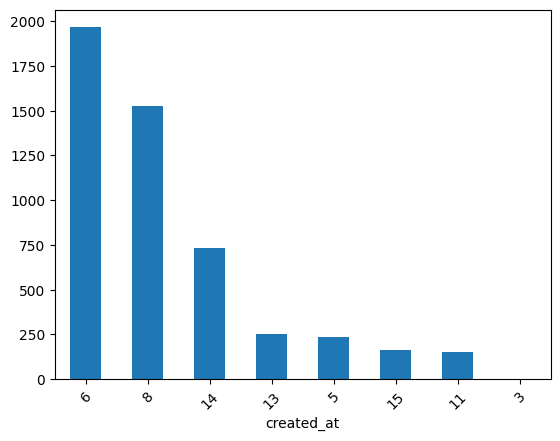

In [ ]:
hour.value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [60]:
polls_question.loc[polls_question['id'].isin([170,169,186,211,290])]

,id,question_text,created_at
70,169,축제에서 공연을 제일 잘 할거 같은 사람은?,2023-03-31 15:23:29
71,170,처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?,2023-03-31 15:23:30
87,186,vote,2023-04-01 11:09:15
112,211,앞으로의 인생을 가장 재미있게 살것 같은 사람은?,2023-04-01 11:09:20
191,290,모든 사람과 잘 지낼 것 같은 사람은?,2023-04-01 11:09:35


In [61]:
polls_question[polls_question['question_text'].str.contains('vote', case=False)]

,id,question_text,created_at
87,186,vote,2023-04-01 11:09:15
384,483,vote,2023-05-02 05:33:11
540,639,vote,2023-05-11 15:52:44
587,696,vote,2023-05-15 13:58:24
603,712,vote,2023-05-15 13:58:30
616,725,vote,2023-05-15 13:58:35
627,736,vote,2023-05-15 13:58:40
698,807,vote,2023-05-15 13:59:11
772,881,vote,2023-05-15 13:59:44
831,940,vote,2023-05-15 14:00:10


##### polls_questionpiece

In [13]:
polls_questionpiece = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionpiece.parquet', engine='pyarrow')

In [15]:
polls_questionpiece

,id,is_voted,created_at,question_id,is_skipped
0,998458,1,2023-04-28 12:27:22,252,0
1,998459,1,2023-04-28 12:27:22,244,0
2,998460,1,2023-04-28 12:27:22,183,0
3,998461,1,2023-04-28 12:27:22,101,0
4,998462,1,2023-04-28 12:27:22,209,0
...,...,...,...,...,...
1265471,208385226,0,2024-05-07 11:32:30,960,0
1265472,208385227,0,2024-05-07 11:32:30,1402,0
1265473,208385228,0,2024-05-07 11:32:30,1676,0
1265474,208385229,0,2024-05-07 11:32:30,3115,0


In [53]:
polls_questionpiece.groupby(['question_id'])[['id']].count().sort_values(by='id',ascending=False).reset_index().rename(columns={'id' : 'count'})

,question_id,count
0,170,2030
1,290,2021
2,169,2017
3,211,2009
4,186,1991
...,...,...
4939,4926,1
4940,4556,1
4941,4551,1
4942,4931,1


##### polls_questionreport

In [ ]:
polls_questionreport = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionreport.parquet', engine='pyarrow')

##### polls_questionset

In [ ]:
polls_questionset = pd.read_parquet('gs://sprintda05_final_project/votes/polls_questionset.parquet', engine='pyarrow')

##### polls_usercandidate

In [ ]:
polls_usercandidate = pd.read_parquet('gs://sprintda05_final_project/votes/polls_usercandidate.parquet', engine='pyarrow')